In [ ]:
!pip install rasterio
!pip install Pillow
!pip install -U tensorflow
!pip install -U keras
!pip install git+https://github.com/qubvel/segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.13.1 which is incompatible.
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-me1b7pzt
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-me1b7pzt
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) 

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.

In [ ]:
import tensorflow as tf
import cv2
import matplotlib
import os,re
import rasterio
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show, show_hist
from sklearn.model_selection import train_test_split
import sys,traceback,signal
import keras
import segmentation_models as sm

In [ ]:
dataset_path = "/content/drive/MyDrive/Tiles"

image_folder = os.path.join(dataset_path, "Rasters")
mask_folder = os.path.join(dataset_path, "Masks")

image_files = sorted(os.listdir(image_folder))
mask_files = sorted(os.listdir(mask_folder))

# Check if the number of images and masks match
if len(image_files) != len(mask_files):
    raise ValueError("Number of images and masks don't match")

num_images = len(image_files)

# Lists to store the loaded images and masks
images = []
masks = []

for i in range(num_images):
    image_path = os.path.join(image_folder, image_files[i])
    mask_path = os.path.join(mask_folder, mask_files[i])

    # Open the image and mask using rasterio
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Read all the channels

    with rasterio.open(mask_path) as src:
        mask = src.read(1)  # Read only the first channel (assuming the mask is single-channel)

    # Append the image and mask to the respective lists
    images.append(image)
    masks.append(mask)

# Convert the lists to numpy arrays
images = np.array(images)
masks = np.array(masks)

# Print the shape of the loaded dataset
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)

Images shape: (1050, 256, 256)
Masks shape: (1050, 256, 256)


In [ ]:
intX = np.expand_dims(images, axis=-1)
intY = np.expand_dims(masks, axis=-1)
intxtrain,intxtest,intytrain,intytest=train_test_split(intX,intY,test_size=0.2,random_state=5)

In [ ]:
BACKBONE = "resnet101"
preprocess = sm.get_preprocessing(BACKBONE)

In [ ]:
model = sm.Unet(backbone_name=BACKBONE,encoder_weights=None,input_shape=(256,256,1))
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 1)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 128, 128, 64  3136        ['zero_padding2d[0][0]']   

In [ ]:
intxtrain = preprocess(intxtrain)
intxtest = preprocess(intxtest)
intytrain = (intytrain/255).astype(np.float32)
intytest = (intytest/255).astype(np.float32)
intxval = intxtest[:(len(intxtest)//2)]
intxtest = intxtest[(len(intxtest)//2):len(intxtest)]
intyval = intytest[:(len(intytest)//2)]
intytest = intytest[(len(intytest)//2):len(intytest)]

In [ ]:
history = model.fit(x=intxtrain,y=intytrain,batch_size=32,verbose=1,epochs=20,validation_data=(intxval,intyval))

Epoch 1/20
27/27 [==============================] - 127s 1s/step - loss: 1.3373 - iou_score: 0.1456 - val_loss: 34704359424.0000 - val_iou_score: 4.1120e-11
Epoch 2/20
27/27 [==============================] - 24s 902ms/step - loss: 1.2694 - iou_score: 0.1535 - val_loss: 13699612.0000 - val_iou_score: 1.2954e-07
Epoch 3/20
27/27 [==============================] - 24s 902ms/step - loss: 1.2609 - iou_score: 0.1638 - val_loss: 777358.1250 - val_iou_score: 0.0013
Epoch 4/20
27/27 [==============================] - 25s 915ms/step - loss: 1.2507 - iou_score: 0.1709 - val_loss: 1049.5967 - val_iou_score: 0.0190
Epoch 5/20
27/27 [==============================] - 25s 915ms/step - loss: 1.2469 - iou_score: 0.1678 - val_loss: 12.3033 - val_iou_score: 0.0957
Epoch 6/20
27/27 [==============================] - 25s 911ms/step - loss: 1.2392 - iou_score: 0.1714 - val_loss: 62.5405 - val_iou_score: 0.1043
Epoch 7/20
27/27 [==============================] - 25s 912ms/step - loss: 1.2456 - iou_score: 0.

In [14]:
model.save("smoke_resnet101_20epochs_1band.h5")

Test IoU Score: 0.18848958611488342


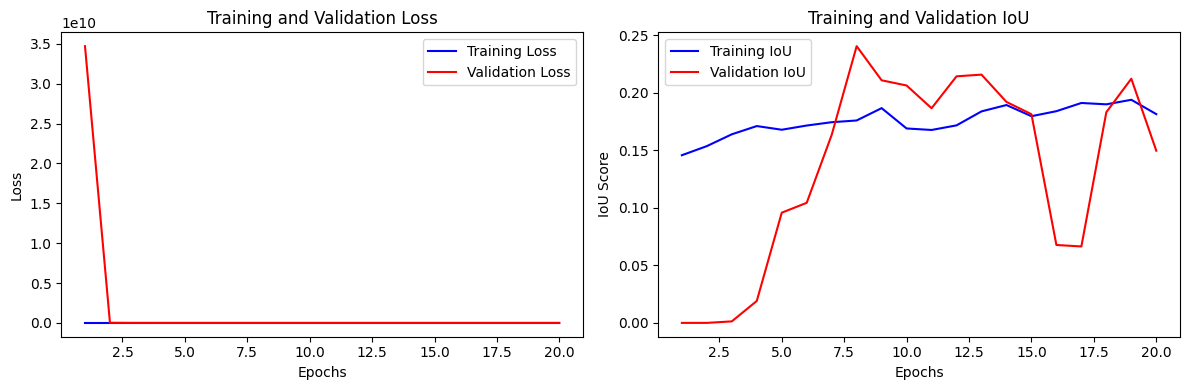

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(intxtest, intytest, verbose=0)
print("Test IoU Score:", score[1])

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation IoU
plt.subplot(1, 2, 2)
plt.plot(epochs, train_iou, 'b-', label='Training IoU')
plt.plot(epochs, val_iou, 'r-', label='Validation IoU')
plt.title('Training and Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [15]:
from keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.utils import CustomObjectScope
import segmentation_models as sm

# Define the custom loss function
def binary_crossentropy_plus_jaccard_loss(y_true, y_pred):
    bce_loss = K.binary_crossentropy(y_true, y_pred)
    jaccard_loss = sm.losses.jaccard_loss(y_true, y_pred)
    return bce_loss + jaccard_loss

# Define the custom metric function
def iou_score(y_true, y_pred):
    iou = sm.metrics.iou_score(y_true, y_pred)
    return iou

# Register the custom loss and metric functions
with CustomObjectScope({'binary_crossentropy_plus_jaccard_loss': binary_crossentropy_plus_jaccard_loss,
                        'iou_score': iou_score}):
    model = load_model('/content/smoke_resnet101_20epochs_1band.h5')

# Compile the model with the desired optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss=binary_crossentropy_plus_jaccard_loss,
              metrics=[iou_score])


# Train the model for additional epochs
history = model.fit(x=intxtrain, y=intytrain, batch_size=32, verbose=1, epochs=20, validation_data=(intxval, intyval))

# Save the updated model
model.save('smoke_resnet101_1band_40epoch.h5')


Epoch 1/20
27/27 [==============================] - 95s 1s/step - loss: 1.2196 - iou_score: 0.1842 - val_loss: 13.4077 - val_iou_score: 0.0704
Epoch 2/20
27/27 [==============================] - 25s 937ms/step - loss: 1.2077 - iou_score: 0.1925 - val_loss: 1.3000 - val_iou_score: 0.1487
Epoch 3/20
27/27 [==============================] - 25s 921ms/step - loss: 1.2321 - iou_score: 0.1830 - val_loss: 1.5885 - val_iou_score: 0.0709
Epoch 4/20
27/27 [==============================] - 25s 930ms/step - loss: 1.2078 - iou_score: 0.1918 - val_loss: 1.7852 - val_iou_score: 0.1110
Epoch 5/20
27/27 [==============================] - 25s 931ms/step - loss: 1.1977 - iou_score: 0.1957 - val_loss: 2.2858 - val_iou_score: 0.1840
Epoch 6/20
27/27 [==============================] - 25s 935ms/step - loss: 1.1935 - iou_score: 0.2002 - val_loss: 1.2642 - val_iou_score: 0.1977
Epoch 7/20
27/27 [==============================] - 25s 933ms/step - loss: 1.2127 - iou_score: 0.1874 - val_loss: 1.3854 - val_iou_s

Test IoU Score: 0.2696503698825836


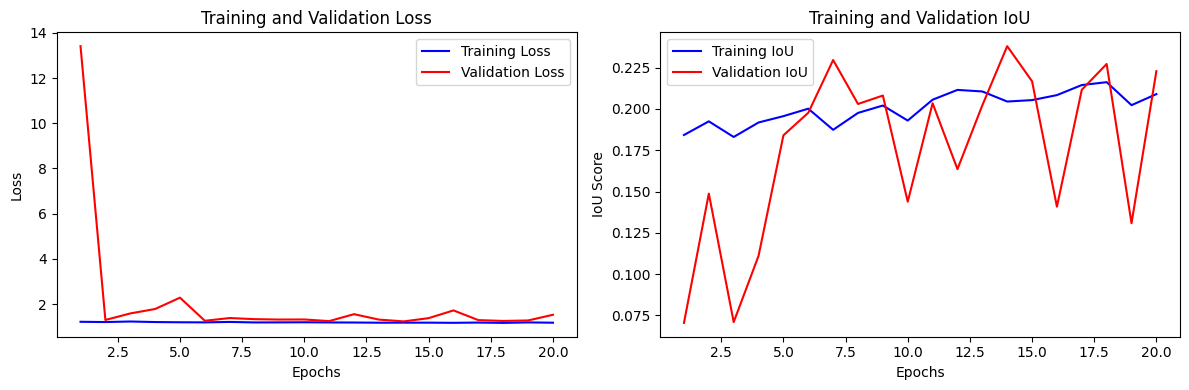

In [16]:
# Evaluate the model on the test set
score = model.evaluate(intxtest, intytest, verbose=0)
print("Test IoU Score:", score[1])

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation IoU
plt.subplot(1, 2, 2)
plt.plot(epochs, train_iou, 'b-', label='Training IoU')
plt.plot(epochs, val_iou, 'r-', label='Validation IoU')
plt.title('Training and Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [19]:
from keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.utils import CustomObjectScope
import segmentation_models as sm

# Define the custom loss function
def binary_crossentropy_plus_jaccard_loss(y_true, y_pred):
    bce_loss = K.binary_crossentropy(y_true, y_pred)
    jaccard_loss = sm.losses.jaccard_loss(y_true, y_pred)
    return bce_loss + jaccard_loss

# Define the custom metric function
def iou_score(y_true, y_pred):
    iou = sm.metrics.iou_score(y_true, y_pred)
    return iou

# Register the custom loss and metric functions
with CustomObjectScope({'binary_crossentropy_plus_jaccard_loss': binary_crossentropy_plus_jaccard_loss,
                        'iou_score': iou_score}):
    model = load_model('/content/smoke_resnet101_100epoch_1band.h5')

# Compile the model with the desired optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss=binary_crossentropy_plus_jaccard_loss,
              metrics=[iou_score])


# Train the model for additional epochs
history = model.fit(x=intxtrain, y=intytrain, batch_size=32, verbose=1, epochs=100, validation_data=(intxval, intyval))

# Save the updated model
model.save('smoke_resnet101_200epoch_1band.h5')


Epoch 1/100
27/27 [==============================] - 92s 984ms/step - loss: 0.9400 - iou_score: 0.3829 - val_loss: 1.3440 - val_iou_score: 0.2509
Epoch 2/100
27/27 [==============================] - 25s 919ms/step - loss: 0.9213 - iou_score: 0.3859 - val_loss: 1.2993 - val_iou_score: 0.2769
Epoch 3/100
27/27 [==============================] - 25s 943ms/step - loss: 0.9138 - iou_score: 0.3950 - val_loss: 1.2858 - val_iou_score: 0.2493
Epoch 4/100
27/27 [==============================] - 25s 935ms/step - loss: 0.9236 - iou_score: 0.3852 - val_loss: 1.3423 - val_iou_score: 0.2867
Epoch 5/100
27/27 [==============================] - 25s 934ms/step - loss: 0.9306 - iou_score: 0.3856 - val_loss: 1.2181 - val_iou_score: 0.2320
Epoch 6/100
27/27 [==============================] - 25s 936ms/step - loss: 0.9137 - iou_score: 0.3817 - val_loss: 1.4266 - val_iou_score: 0.2642
Epoch 7/100
27/27 [==============================] - 25s 921ms/step - loss: 0.8585 - iou_score: 0.4260 - val_loss: 1.1901 - 

Test IoU Score: 0.2430601865053177


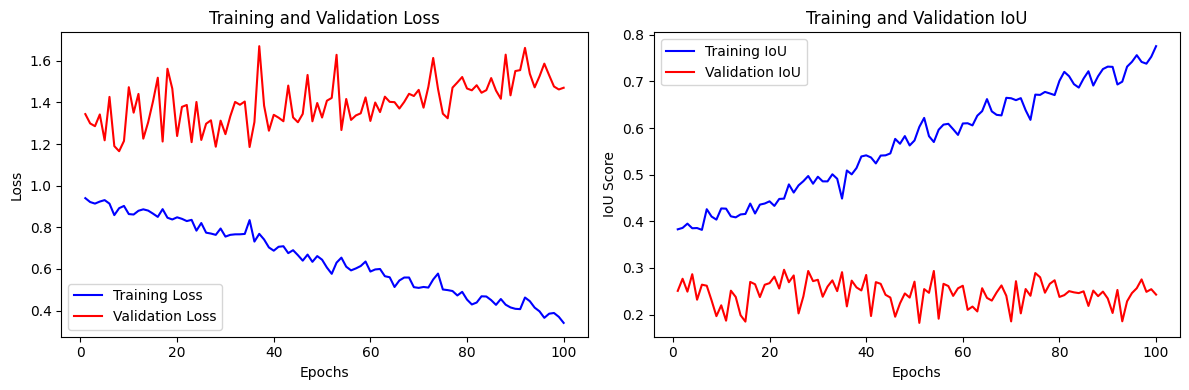

In [20]:
# Evaluate the model on the test set
score = model.evaluate(intxtest, intytest, verbose=0)
print("Test IoU Score:", score[1])

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation IoU
plt.subplot(1, 2, 2)
plt.plot(epochs, train_iou, 'b-', label='Training IoU')
plt.plot(epochs, val_iou, 'r-', label='Validation IoU')
plt.title('Training and Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()